In [1]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
# Display the shape of the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


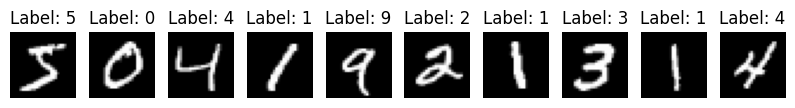

In [15]:
# Function to plot images from the dataset
def plot_mnist_images(images, labels, num_images):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize the first 10 images from the training dataset
plot_mnist_images(x_train, y_train, 10)

In [16]:
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to between 0 and 1
x_train = np.expand_dims(x_train, -1)  # Add a channel dimension (for grayscale)
x_test = np.expand_dims(x_test, -1)


In [18]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9149 - loss: 0.2873 - val_accuracy: 0.9865 - val_loss: 0.0416
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9861 - loss: 0.0444 - val_accuracy: 0.9867 - val_loss: 0.0398
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9916 - loss: 0.0284 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9932 - loss: 0.0202 - val_accuracy: 0.9911 - val_loss: 0.0278
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 0.9883 - val_loss: 0.0365


In [21]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9856 - loss: 0.0465
Test accuracy: 0.9883000254631042


In [22]:
# Save the model (optional)
model.save('mnist_cnn_model.h5')

In [23]:
# Example of making a prediction
predictions = model.predict(x_test[:5])
print("Example predictions:")
for i, pred in enumerate(predictions):
    print(f"Predicted: {np.argmax(pred)}, Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Example predictions:
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 4, Actual: 4


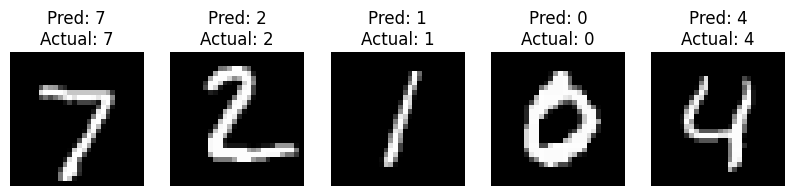

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nActual: {y_test[i]}")
    plt.axis('off')
plt.show()